## 模型正则化


$$\ell \left( \theta  \right)=\frac{1}{2}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)}^{2}}}=\frac{1}{2}\sum\limits_{i=1}^{m}{{{\left( {{\theta }^{T}}{{x}^{\left( i \right)}}-{{y}^{\left( i \right)}} \right)}^{2}}}$$

### Ridge
$$\ell(\theta)+\lambda\sum\limits_{i=1}^{m}{\theta}^2$$

### Lasso

$$\ell(\theta)+\lambda\sum\limits_{i=1}^{m}|{\theta}|$$

### Elastic Net

$$\ell(\theta)+\lambda\sum\limits_{i=1}^{m}{\theta}^2++\lambda\sum\limits_{i=1}^{m}|{\theta}|$$

### 参考资料 

+ http://web.stanford.edu/~hastie/Papers/elasticnet.pdf
+ http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
+ 知乎关于Ridge,Lasso的回答 https://www.zhihu.com/question/38121173

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge,LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
%matplotlib inline

In [2]:
boston=load_boston()
X = MinMaxScaler().fit_transform(boston.data)
y=boston.target
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [15]:
ridge=Ridge().fit(X_train,y_train)
print("training score:{:.3f}".format(ridge.score(X_train,y_train)))
print("training score:{:.3f}".format(ridge.score(X_test,y_test)))

training score:0.886
training score:0.753


In [4]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("training score:{:.3f}".format(ridge10.score(X_train,y_train)))
print("training score:{:.3f}".format(ridge10.score(X_test,y_test)))

training score:0.788
training score:0.636


In [5]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("training score:{:.3f}".format(ridge01.score(X_train,y_train)))
print("training score:{:.3f}".format(ridge01.score(X_test,y_test)))

training score:0.929
training score:0.772


In [6]:
lr=LinearRegression().fit(X_train,y_train)

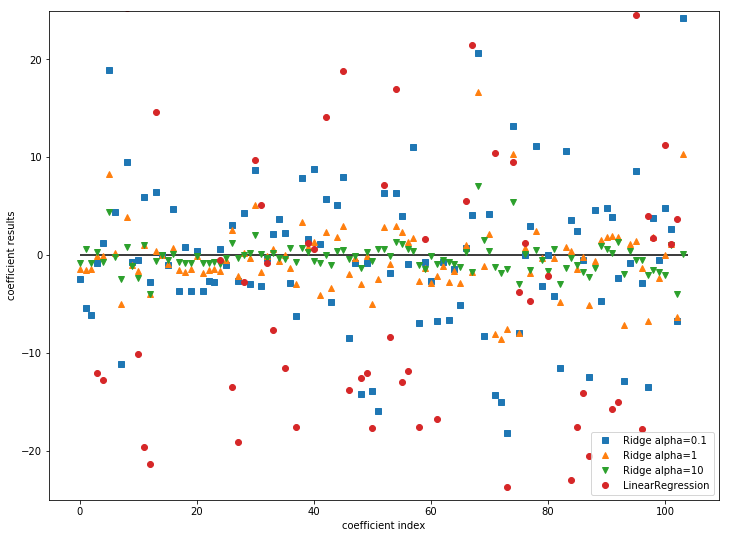

In [7]:
plt.figure(figsize=(12,9))
plt.plot(ridge01.coef_,'s',label="Ridge alpha=0.1")
plt.plot(ridge.coef_,'^',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'v',label="Ridge alpha=10")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient results")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [8]:
from sklearn.linear_model import Lasso

In [17]:
lasso=Lasso().fit(X_train,y_train)
print("training score:{:.3f}".format(lasso.score(X_train,y_train)))
print("test score:{:.3f}".format(lasso.score(X_test,y_test)))
print("number of features used:{}".format(np.sum(lasso.coef_!=0)))

training score:0.293
test score:0.209
number of features used:4


In [18]:
lasso01=Lasso(alpha=0.1).fit(X_train,y_train)
print("training score:{:.3f}".format(lasso01.score(X_train,y_train)))
print("test score:{:.3f}".format(lasso01.score(X_test,y_test)))
print("number of features used:{}".format(np.sum(lasso01.coef_!=0)))

training score:0.771
test score:0.630
number of features used:8


In [19]:
lasso001=Lasso(alpha=0.01).fit(X_train,y_train)
print("training score:{:.3f}".format(lasso001.score(X_train,y_train)))
print("test score:{:.3f}".format(lasso001.score(X_test,y_test)))
print("number of features used:{}".format(np.sum(lasso001.coef_!=0)))

training score:0.896
test score:0.768
number of features used:32


C:\Anaconda\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
lasso001=Lasso(alpha=0.01,
               max_iter=100000).fit(X_train,y_train)
print("training score:{:.3f}".format(lasso001.score(X_train,y_train)))
print("test score:{:.3f}".format(lasso001.score(X_test,y_test)))
print("number of features used:{}".format(np.sum(lasso001.coef_!=0)))

training score:0.897
test score:0.766
number of features used:33


In [22]:
lasso0001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("training score:{:.3f}".format(lasso0001.score(X_train,y_train)))
print("test score:{:.3f}".format(lasso0001.score(X_test,y_test)))
print("number of features used:{}".format(np.sum(lasso0001.coef_!=0)))

training score:0.951
test score:0.640
number of features used:94


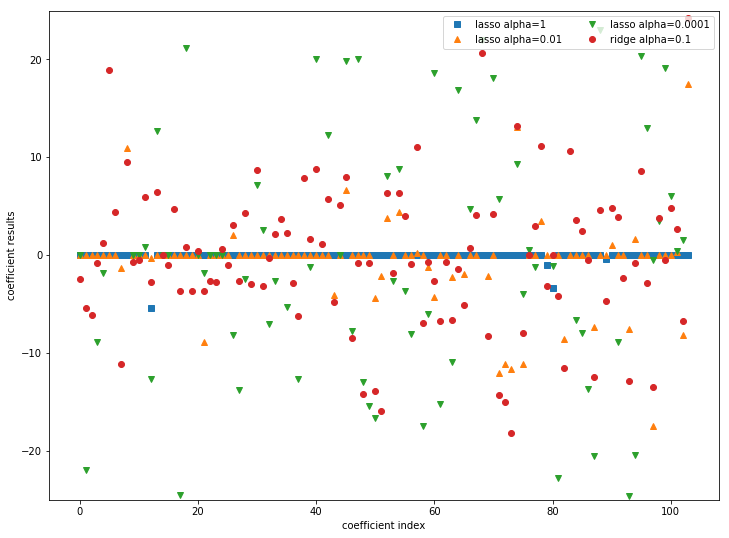

In [14]:
plt.figure(figsize=(12,9))
plt.plot(lasso.coef_,'s',label="lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="lasso alpha=0.01")
plt.plot(lasso0001.coef_,'v',label="lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="ridge alpha=0.1")
#plt.legend(ncol=2,loc=(0,1))
plt.legend(ncol=2,loc=1)
plt.ylim(-25,25)
plt.xlabel("coefficient index")
plt.ylabel("coefficient results")